In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/model-loss/loss.csv
/kaggle/input/covid19-global-forecasting-week-3/train.csv
/kaggle/input/covid19-global-forecasting-week-3/submission.csv
/kaggle/input/covid19-global-forecasting-week-3/test.csv
/kaggle/input/time-series-covid19/time_series_covid19_confirmed_global.csv
/kaggle/input/corona-india-future-predictions-weights/corona_future_prediction_india_weights.h5


In [2]:
a=pd.read_csv('../input/time-series-covid19/time_series_covid19_confirmed_global.csv')

In [3]:
a

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,2,2,3,3,3
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,2,4
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,4


In [4]:
b=a.transpose()

In [5]:
b

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,Anguilla,British Virgin Islands,Turks and Caicos Islands,NaN,NaN,NaN,NaN,"Bonaire, Sint Eustatius and Saba",NaN,Falkland Islands (Islas Malvinas)
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,United Kingdom,United Kingdom,MS Zaandam,Botswana,Burundi,Sierra Leone,Netherlands,Malawi,United Kingdom
Lat,33,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,18.2206,18.4207,21.694,0,-22.3285,-3.3731,8.46056,12.1784,-13.2543,-51.7963
Long,65,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,...,-63.0686,-64.64,-71.7979,0,24.6849,29.9189,-11.7799,-68.2385,34.3015,-59.5236
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/31/20,174,243,716,376,7,7,1054,532,80,2032,...,2,3,5,2,4,2,1,0,0,0
4/1/20,237,259,847,390,8,7,1054,571,84,2182,...,2,3,6,9,4,2,2,0,0,0
4/2/20,273,277,986,428,8,9,1133,663,87,2298,...,3,3,5,9,4,3,2,2,3,0
4/3/20,281,304,1171,439,8,15,1265,736,91,2389,...,3,3,5,9,4,3,2,2,3,0


In [6]:
train=b[[131]].values

In [7]:
train_x=train[4:]

In [8]:
y=[]
for i in train_x:
    y.append(i[0])

In [9]:
y.append(3374)

In [10]:
#infected in india in the following days
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3374]

In [11]:
x=list(range(len(y)))

In [12]:
#nth day
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74]

In [13]:
import seaborn as sns

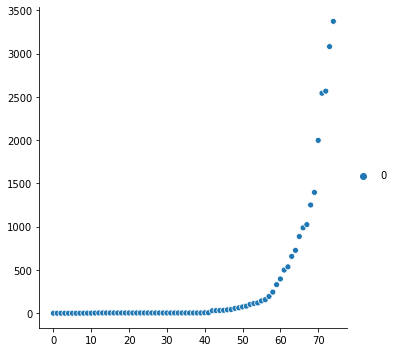

In [14]:
#infection in the  nth day in india
sns.relplot(data=pd.DataFrame(y))
#x axis is days and y axis is infected people

In [15]:
x=np.array(x)
y=np.array(y)

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
import tensorflow as tf

In [18]:
predict=Sequential([Dense(74,activation='relu',input_shape=(1,)),
                    Dense(74*2,activation='relu'),
                    Dense(74*2*2,activation='relu'),
                    Dense(74*2*2*2,activation='relu'),
                    Dense(74*2*2*2,activation='relu'),
                    Dense(1)])

In [19]:
predict.compile(optimizer='adam',loss='mse',metrics=['mse','mae','accuracy'])

In [20]:
'''You can uncomment to start training from begining or you can use weights of pre trained model'''
#predict.fit(x,y,batch_size=75,epochs=50000)

'You can uncomment to start training from begining or you can use weights of pre trained model'

In [21]:
predict.load_weights('/kaggle/input/corona-india-future-predictions-weights/corona_future_prediction_india_weights.h5')

In [22]:
predict.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 74)                148       
_________________________________________________________________
dense_1 (Dense)              (None, 148)               11100     
_________________________________________________________________
dense_2 (Dense)              (None, 296)               44104     
_________________________________________________________________
dense_3 (Dense)              (None, 592)               175824    
_________________________________________________________________
dense_4 (Dense)              (None, 592)               351056    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 593       
Total params: 582,825
Trainable params: 582,825
Non-trainable params: 0
__________________________________________________

In [23]:
'''You can uncomment the following things if you have started to train from the begining'''
#loss=predict.history.history
#loss_pd=pd.DataFrame(loss)
#loss_pd.plot()
#loss_pd.to_csv('loss.csv')

'You can uncomment the following things if you have started to train from the begining'

In [24]:
loss_pd=pd.read_csv('/kaggle/input/model-loss/loss.csv')

In [25]:
loss_pd=loss_pd.drop('Unnamed: 0',axis=1)

In [26]:
loss_pd

,loss,mse,mae,accuracy
0,617106.750000,617106.750000,319.352783,0.106667
1,610725.875000,610725.875000,314.487305,0.093333
2,604988.562500,604988.562500,312.366211,0.066667
3,597666.062500,597666.062500,309.942200,0.053333
4,588060.000000,588060.000000,306.709076,0.053333
...,...,...,...,...
49995,621.484619,621.484619,7.719572,0.146667
49996,620.859924,620.859924,7.799618,0.146667
49997,621.598877,621.598877,7.887428,0.146667
49998,622.366394,622.366394,7.693153,0.146667


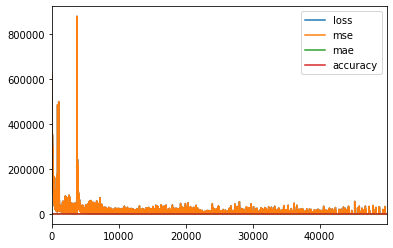

In [27]:
loss_pd.plot()

In [28]:
predict.predict([[74]]) #75th day is August 5 2020

array([[3342.9292]], dtype=float32)

In [29]:
predicted_values=[]
print('||',end='')
for i in range(1000):
    if i%9 is 0:
        print('=',end='')
    predicted_values.append(predict.predict([[i]]))
print('||')    

||================================================================================================================||


In [30]:
predicted_values

[array([[-0.19647668]], dtype=float32),
 array([[-0.1593111]], dtype=float32),
 array([[-0.11411886]], dtype=float32),
 array([[-0.03199254]], dtype=float32),
 array([[0.0511104]], dtype=float32),
 array([[0.17127867]], dtype=float32),
 array([[0.29979724]], dtype=float32),
 array([[0.43589807]], dtype=float32),
 array([[0.65371126]], dtype=float32),
 array([[0.95454746]], dtype=float32),
 array([[1.3876992]], dtype=float32),
 array([[1.8255271]], dtype=float32),
 array([[2.2633584]], dtype=float32),
 array([[2.5610478]], dtype=float32),
 array([[2.6359308]], dtype=float32),
 array([[2.7204554]], dtype=float32),
 array([[2.8390403]], dtype=float32),
 array([[2.957621]], dtype=float32),
 array([[3.0820746]], dtype=float32),
 array([[3.203376]], dtype=float32),
 array([[3.3603048]], dtype=float32),
 array([[3.3728368]], dtype=float32),
 array([[3.061593]], dtype=float32),
 array([[2.9527729]], dtype=float32),
 array([[2.8278322]], dtype=float32),
 array([[2.7468643]], dtype=float32),
 ar

In [31]:
future=[]
for i in predicted_values:
    if round(i[0][0])<=0:
        future.append(0)
    else:
        future.append(round(i[0][0]))

In [32]:
future_df=pd.DataFrame({'Infected_people':future})

In [33]:
future_df

,Infected_people
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,408149.0
996,408598.0
997,409046.0
998,409495.0


Actual_graph


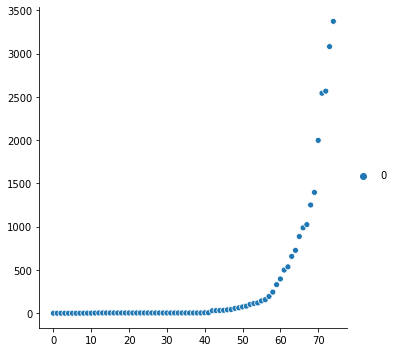

In [34]:
print("Actual_graph")
sns.relplot(data=pd.DataFrame(y))


predicted_graph


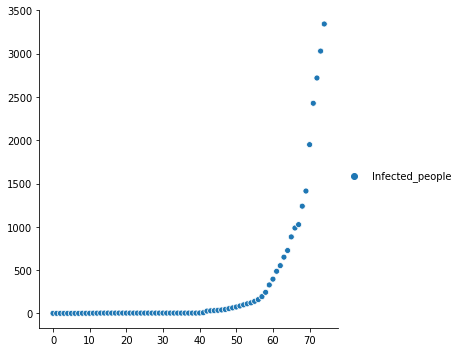

In [35]:
print("predicted_graph")
sns.relplot(data=future_df[:75])

In [36]:
print("Prediction on future days")
future_df

Prediction on future days


,Infected_people
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,408149.0
996,408598.0
997,409046.0
998,409495.0


Future predictions graph


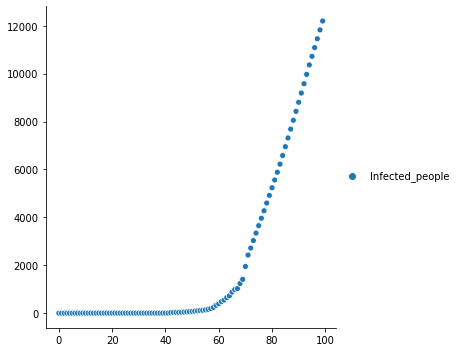

In [37]:
print("Future predictions graph")
sns.relplot(data=future_df[:100])

In [38]:
def preprocess(day):
    return round(day)

The Predicted infected people on the day 74 in India are : 3343.0


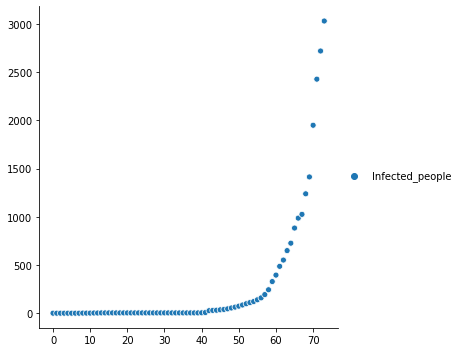

In [39]:
#prediction on the nth day 
'''74th  day is 5th april 2020'''
'''change the day number to your own number to predict'''
day=74
if preprocess(predict.predict([[day]])[0][0] <= 0):
    infected=0
else:
    infected=(preprocess(predict.predict([[day]])[0][0]))
print("The Predicted infected people on the day",day,"in India are :",infected)    
sns.relplot(data=future_df[:day])

Day 89 is August 20
The Predicted infected people on the day 89 in India are : 8426.0


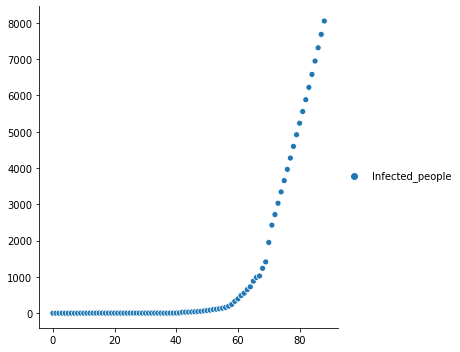

In [40]:
print("Day 89 is August 20")
day=89
if preprocess(predict.predict([[day]])[0][0] <= 0):
    infected=0
else:
    infected=(preprocess(predict.predict([[day]])[0][0]))
print("The Predicted infected people on the day",day,"in India are :",infected)    
sns.relplot(data=future_df[:day])

In [41]:
'''If it goes on like this in india then approximately 8426 people will get infected on Auguest 20 2020 so please keep masks and wash your hands to save yourself and others'''

'If it goes on like this in india then approximately 8426 people will get infected on Auguest 20 2020 so please keep masks and wash your hands to save yourself and others'

The Predicted infected people on the day 100 in India are : 12572.0


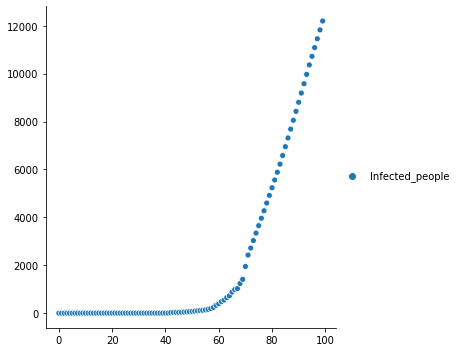

In [42]:
'''Change the day number as your wish , set your reference to August 5th as 74th day'''
'''Enter any day number to predict the infection rate on the specific day'''

day=100


if preprocess(predict.predict([[day]])[0][0] <= 0):
    infected=0
else:
    infected=(preprocess(predict.predict([[day]])[0][0]))
print("The Predicted infected people on the day",day,"in India are :",infected)    
sns.relplot(data=future_df[:day])

In [43]:
future_df.to_csv('submission_india_corona_future_predictins_reference-day74-as-August-5.csv')